**This notebook covers feature sclaing for given linear regression problem and covers learning rate optimization**

In [77]:
# let's import the required libs

import numpy as np
import matplotlib.pyplot as plt
import copy
np.set_printoptions(precision=2)

In [44]:
# let's prepare the training data using housing examples

x_train = np.array([[952,2,1,65],[1244,3,2,64],[1947,3,2,17]])
y_train = np.array([271.5,232,509.8])
x_features = np.array(['size(sqft','bedrooms','floors','age'])

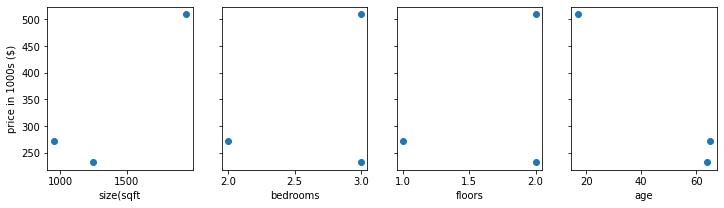

In [45]:
# now let's plot these features on the graph

# x_size = x_features.shape[0]

# One way to plot on graph
#for i in range(x_size):
#    plt.scatter(x_train[:,i],y_train,marker='x',color='g')
#    plt.xlabel(x_features[i])
#    plt.ylabel('price (per 1000 $)')
#    plt.show()

# anoter way to plot adjacently

# fig defines a container for subplots and ax defines the axes
# 1 defines number of rows of subplots and 4 defines columns
# figsize defines width and height of the subplots
# sharey defines if the y axis is shared between subplots

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])

ax[0].set_ylabel("price in 1000s ($)")
plt.show()

In [46]:
# now let's create a function to compute the predicted y

def compute_pred_y_fn(x,w,b):
    fn_wb = np.dot(x,w) + b
    return fn_wb

In [60]:
# now let's test the function to compute predicted y

w_sample = np.array([0.0005,1,1,1])
b_sample = 500

for i in range(x_train.shape[0]):
    pred_y = compute_pred_y_fn(x_train[i],w_sample,b_sample)
    print(f"Predicted y for {x_train[i]} is: {pred_y}")

Predicted y for [952   2   1  65] is: 568.476
Predicted y for [1244    3    2   64] is: 569.622
Predicted y for [1947    3    2   17] is: 522.9735000000001


In [61]:
# now let's create the cost function to further understand the cost factor

def compute_cost_fn(x, y, w, b):
    error_sum = 0
    for i in range(x.shape[0]):
        fn_wb = compute_pred_y_fn(x[i], w, b)
        error = np.square(fn_wb - y[i])
        error_sum += error

    j_wb = error_sum / (2 * x.shape[0])
    return j_wb

In [62]:
# now let's compute the cost using the cost function

cost = compute_cost_fn(x_train,y_train,w_sample,b_sample)
print(f"Cost for the given training dataset is: {cost}")

Cost for the given training dataset is: 33726.150093708326


In [71]:
# now let's calculate the derivatives of cost function w.r.t w and b

def comptute_deriv_jwb(x,y,w,b):

    # derivative function is as simple as (pred_y - train_y) * xij/m and (pred_y - train_y)/m

    x_row = x.shape[0] # number of training examples
    x_col = x.shape[1] # number of training features

    dj_dw = np.zeros(x_col)
    dj_db = 0
    
    for i in range(x_row):
        
        error = compute_pred_y_fn(x[i],w,b) - y[i]
        
        for j in range(x_col):
            dj_dw[j] += error * x[i,j] 
        dj_db += error

    return dj_dw/x_row, dj_db/x_row

In [78]:
# now let's create the gradient descent function

def compute_gradient_descent(x,y,a,n,w,b):

    j_hist = np.zeros(n)
    w_hist = np.zeros((n,x.shape[1]))
    b_hist = np.zeros(n)
    w_copy = copy.deepcopy(w)
    b_copy = b

    # computing gradient descent is iterating and computing change in values of w and b w.r.t learning rate and derivatives

    for i in range(n):
        j_hist[i] = compute_cost_fn(x,y,w_copy,b_copy)
        w_hist[i] = w_copy
        b_hist[i] = b_copy
        print(f"when w is {w_copy} and b is {b_copy} then cost is: {j_hist[i]}")
        w_copy = w_copy - a * comptute_deriv_jwb(x,y,w_copy,b_copy)[0]
        b_copy = b_copy - a * comptute_deriv_jwb(x,y,w_copy,b_copy)[1]
        
    return j_hist,w_hist,b_hist

In [85]:
# let's test our gradient descent function
a_in = 1e-7
w_in = np.array([5.0e-01,9.1e-04,4.7e-04,1.1e-02])
b_in = 3.3e-04
compute_gradient_descent(x_train,y_train,a_in,10,w_in,b_in)

when w is [5.0e-01 9.1e-04 4.7e-04 1.1e-02] and b is 0.00033 then cost is: 68326.97878391073
when w is [4.47e-01 8.11e-04 4.06e-04 9.46e-03] and b is 0.0003019747750852079 then cost is: 43311.92477043214
when w is [4.05e-01 7.32e-04 3.55e-04 8.23e-03] and b is 0.0002797304186275242 then cost is: 27633.498253304744
when w is [3.72e-01 6.69e-04 3.15e-04 7.24e-03] and b is 0.00026206268001389467 then cost is: 17806.88753976577
when w is [3.46e-01 6.19e-04 2.82e-04 6.44e-03] and b is 0.0002480181767256335 then cost is: 11647.95535623045
when w is [3.25e-01 5.79e-04 2.56e-04 5.80e-03] and b is 0.00023684213378692213 then cost is: 7787.773895297313
when w is [3.09e-01 5.46e-04 2.35e-04 5.27e-03] and b is 0.0002279370100710014 then cost is: 5368.3552619284665
when w is [2.96e-01 5.20e-04 2.18e-04 4.85e-03] and b is 0.0002208297435264441 then cost is: 3851.9477762826264
when w is [2.86e-01 4.99e-04 2.04e-04 4.49e-03] and b is 0.00021514581984003714 then cost is: 2901.5107052273524
when w is [2

(array([68326.98, 43311.92, 27633.5 , 17806.89, 11647.96,  7787.77,
         5368.36,  3851.95,  2901.51,  2305.8 ]),
 array([[5.00e-01, 9.10e-04, 4.70e-04, 1.10e-02],
        [4.47e-01, 8.11e-04, 4.06e-04, 9.46e-03],
        [4.05e-01, 7.32e-04, 3.55e-04, 8.23e-03],
        [3.72e-01, 6.69e-04, 3.15e-04, 7.24e-03],
        [3.46e-01, 6.19e-04, 2.82e-04, 6.44e-03],
        [3.25e-01, 5.79e-04, 2.56e-04, 5.80e-03],
        [3.09e-01, 5.46e-04, 2.35e-04, 5.27e-03],
        [2.96e-01, 5.20e-04, 2.18e-04, 4.85e-03],
        [2.86e-01, 4.99e-04, 2.04e-04, 4.49e-03],
        [2.77e-01, 4.82e-04, 1.93e-04, 4.20e-03]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

Mean Squared Error (MSE): 68326.97878391073
